<a href="https://colab.research.google.com/github/huynhspm/Basic_ML/blob/main/Copy_of_Cifar10_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Classification Project**

In [66]:
# 1. Thêm các thư viện cần thiết
import numpy as np
import random
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import BatchNormalization, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import time

In [67]:
# 2. Load dữ liệu cifar
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

img_width = 32
img_height = 32
img_channel = 3

label = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


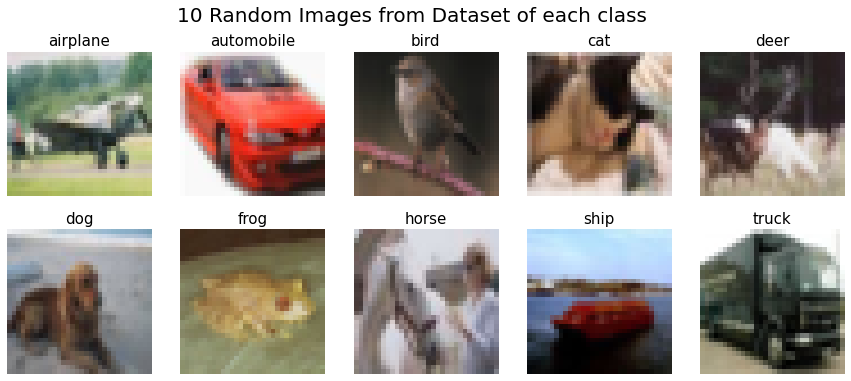

In [68]:
# 3. Show image
def get_ten_random_images():
  d = {}
  while len(d.keys()) < 10:
      idx = random.randint(0, len(y_train)-1)
      if y_train[idx][0] not in d.keys():
          d[y_train[idx][0]] = idx
  return d

d = get_ten_random_images()
rows = 2
cols = 5
fig, axes = plt.subplots(rows, cols, figsize = (15,6))
axes = axes.ravel()
for i in range(1, rows*cols+1):
    axes[i-1].imshow(X_train[d[i-1]])
    axes[i-1].axis('off')
    axes[i-1].set_title(label[i-1], fontsize=15)
fig.suptitle('10 Random Images from Dataset of each class', fontsize = 20)
plt.show()

In [84]:
# 4. Prepare data
img_width = 32
img_height = 32
img_channel = 3

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
 
X_train = X_train/255.0
X_test = X_test/255.0

In [101]:
# 5. Build model
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(img_width, img_height, img_channel)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(2*64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_114 (Conv2D)         (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_126 (Ba  (None, 32, 32, 32)       128       
 tchNormalization)                                               
                                                                 
 conv2d_115 (Conv2D)         (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_127 (Ba  (None, 32, 32, 32)       128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                     

In [88]:
# 6. Train model
start_time = time.time()

numOfEpoch = 30
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy', patience = 2,
                                            verbose = 1, factor = 0.5, min_lr = 0.00001)

H = model.fit(X_train, y_train, validation_split=0.2, batch_size=32, epochs=numOfEpoch, 
              verbose=1, callbacks=[earlystop,learning_rate_reduction])

end_time = time.time()
print("Running time: %.2f (s)" % (end_time - start_time))

Epoch 1/30
1250/1250 [==============================] - 10s 7ms/step - loss: 2.3495 - accuracy: 0.3747 - val_loss: 1.4687 - val_accuracy: 0.4975 - lr: 0.0010
Epoch 2/30
1250/1250 [==============================] - 9s 7ms/step - loss: 1.4153 - accuracy: 0.5530 - val_loss: 1.2086 - val_accuracy: 0.6254 - lr: 0.0010
Epoch 3/30
1250/1250 [==============================] - 9s 7ms/step - loss: 1.0633 - accuracy: 0.6402 - val_loss: 1.0530 - val_accuracy: 0.6289 - lr: 0.0010
Epoch 4/30
1250/1250 [==============================] - 9s 7ms/step - loss: 0.8971 - accuracy: 0.6926 - val_loss: 0.7933 - val_accuracy: 0.7231 - lr: 0.0010
Epoch 5/30
1250/1250 [==============================] - 9s 7ms/step - loss: 0.7903 - accuracy: 0.7268 - val_loss: 0.6702 - val_accuracy: 0.7659 - lr: 0.0010
Epoch 6/30
1250/1250 [==============================] - 9s 7ms/step - loss: 0.7144 - accuracy: 0.7522 - val_loss: 0.6158 - val_accuracy: 0.7850 - lr: 0.0010
Epoch 7/30
1250/1250 [==============================] - 9

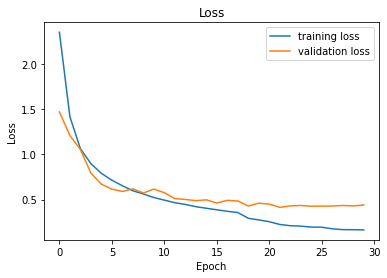

In [89]:
# 7. Vẽ đồ thị loss của traning set và validation set
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

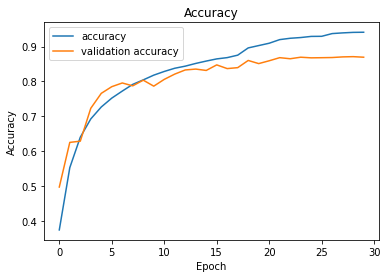

In [90]:
# 8. Vẽ đồ thị accuracy của traning set và validation set
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [91]:
# 9.Đánh giá model với testset
start_time = time.time()
print('[loss, accuracy]: ', model.evaluate(X_test, y_test, verbose = 1))
end_time = time.time()
print("Running time: %.2f (s)" % (end_time - start_time))

313/313 [==============================] - 1s 4ms/step - loss: 0.4574 - accuracy: 0.8697
[loss, accuracy]:  [0.4573728144168854, 0.869700014591217]
Running time: 1.47 (s)


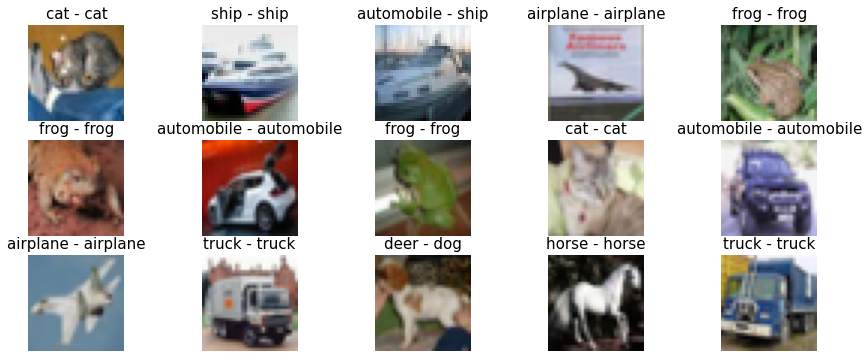

In [92]:
# 10. Show predict on testset
rows = 3
cols = 5

y_pred = model.predict(X_test[0: rows * cols])
y_pred = np.argmax(y_pred, axis = 1)

fig, axes = plt.subplots(rows, cols, figsize = (15,6))
axes = axes.ravel()
for i in range(rows*cols):
    axes[i].imshow(X_test[i])
    axes[i].axis('off')
    axes[i].set_title(label[y_pred[i]] + ' - ' + label[int(y_test[i])], fontsize=15)

In [93]:
# 11. Load ảnh
from google.colab import files
uploaded = files.upload()

Saving New folder.rar to New folder.rar


[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Giá trị dự đoán:  bird


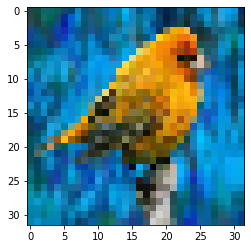

In [99]:
# 12. Predict ảnh mạng
import cv2
img = cv2.imread('Test/1.jpg')
img = cv2.resize(src=img, dsize=(img_width, img_height))
plt.imshow(img)

y_pred = model.predict(img.reshape(1, img_width, img_height, img_channel))
print(y_pred)
y_pred = np.argmax(y_pred)
print('Giá trị dự đoán: ', label[y_pred])

In [100]:
# 13. save model 
model.save('Cifar10_Model.h5')